In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 100)

# Loading Data

In [253]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# save PassengerId for final submission
passengerId = test_df.PassengerId

# Exploring data

In [254]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data contains 891 examples <br>
11 Features (Excluding PassengerId) <br>
1 Target variable (Survived)

In [255]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**38.38% survived** <br>
**Age** colum has missing values <br>
Also, categorical data may have missing values too

In [256]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [257]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


# Deal with missing data

In [258]:
data = [train_df,test_df]


for dataset in data:
    # fill Cabin NaN with U for unknown
    dataset.Cabin = dataset.Cabin.fillna('U')

    
    # find most frequent Embarked value and store in variable
    most_embarked = dataset.Embarked.value_counts().index[0]

    # fill NaN with most_embarked value
    dataset.Embarked = dataset.Embarked.fillna(most_embarked)
    
    # fill NaN with median fare
    dataset.Fare = dataset.Fare.fillna(dataset.Fare.median())

    # with Age deal further

In [259]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


# Feature Engineering

Using SibSp and Parch to create new features: <br>

**Number of Relatives** - Would show quantity of relates on board <br>
**Alone** - would show if person is alone on board or not.

In [260]:
for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Alone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Alone'] = 1
    dataset['Alone'] = dataset['Alone'].astype(int)


c:\users\val\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


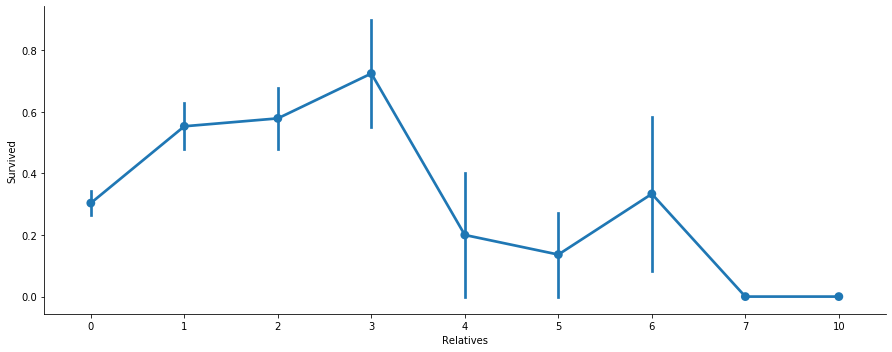

In [261]:
sns.factorplot('Relatives','Survived', data=train_df, aspect = 2.5)

Graph representing survival given a number of relatives you have on board. Having up to 3 relatives increases your chances of survival, having more relatives, decreases.

In [262]:
# Possible to add another Related field family size for instance as top but + 1
# size of families (including the passenger)
 #titanic['FamilySize'] = titanic.Parch + titanic.SibSp + 1

## Titles 
working with titles to divide them into title matching groups

In [263]:
# create a new feature to extract title names from the Name column
for dataset in data:
    dataset['Title'] = dataset['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [ ]:
x = lambda x: if x == 0,

In [264]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Ms                1
the Countess      1
Mme               1
Don               1
Capt              1
Sir               1
Jonkheer          1
Name: Title, dtype: int64

In [265]:
# normalize the titles
normalized_titles = {
    "Capt":       "Personnel",
    "Col":        "Personnel",
    "Major":      "Personnel",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Dr",
    "Rev":        "Personnel",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Mr",
    "Lady" :      "Royalty"
}

for dataset in data:
     # map the normalized titles to the current titles 
    dataset.Title = dataset.Title.map(normalized_titles)
    
# view value counts for the normalized titles
print(train_df.Title.value_counts())

Mr           557
Miss         184
Mrs          127
Personnel     11
Dr             7
Royalty        5
Name: Title, dtype: int64


## Age
Using groupby of different titles, genders and ticket class to predict mediat Age of persons - which later can be used to assign Ages to missing persons

In [266]:
#merge train and test datasets
age_prediction_df = pd.concat([train_df, test_df], ignore_index=True, sort=True)

# group by Sex, Pclass, and Title 
grouped = age_prediction_df.groupby(['Sex','Pclass', 'Title'])  
grouped.Age.median()

Sex     Pclass  Title    
female  1       Dr           49.0
                Miss         30.0
                Mrs          45.0
                Royalty      39.0
        2       Miss         20.0
                Mrs          30.0
        3       Miss         18.0
                Mrs          31.0
male    1       Dr           47.0
                Mr           40.0
                Personnel    53.0
                Royalty      40.0
        2       Dr           38.5
                Mr           29.0
                Personnel    41.5
        3       Mr           25.0
Name: Age, dtype: float64

In [267]:
# apply the grouped median value on the Age NaN
for dataset in data:
    dataset.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

train_df.Age.describe()

count    891.000000
mean      29.142727
std       13.461366
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

## Cabin

Letter in front of a cabin represents some sort of section or a deck on the ship, therefore keeping only letters makes most sense in our case. Removing numbers.

In [268]:
# Option 1: map first letter of cabin to itself
for dataset in data:
    dataset.Cabin = dataset.Cabin.map(lambda x: x[0])
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,0,1,Mr


## Data Preprocessing

In [269]:
#Drop passengerID
#train_df = train_df.drop(['PassengerId'], axis=1)
#test_df = test_df.drop(['PassengerId'], axis=1)

In [270]:
#Age - turn it into integer
data = [train_df, test_df]

for dataset in data:
    dataset["Age"] = dataset["Age"].astype(int)

In [271]:
#Gender - converting features into numeric

genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [272]:
#Drop names
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [273]:
#Drop Ticket numbers
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [274]:
#Fare - Encode as integer
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)

In [275]:
#Embarked - Encode

data = [train_df, test_df]
embarked = {"S": 1, "C": 2, "Q": 3,}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)



In [276]:
#Title - Encode
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Personnel": 4, "Dr": 5, "Royalty": 6}

for dataset in data:
    dataset['Title'] = dataset['Title'].map(titles)

In [277]:
#Cabin - Encode
data = [train_df, test_df]
cabins = { 'U':0, 'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7, 'T':8,}


for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].map(cabins)

In [278]:
# Possibility to add age group - would it predict better?

    
data = [train_df, test_df]

for dataset in data:
    dataset.loc[dataset['Age'] <= 11, 'Age Group'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age Group'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age Group'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age Group'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age Group'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age Group'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age Group'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age Group'] = 6
    dataset['Age Group'] = dataset['Age Group'].astype(int)


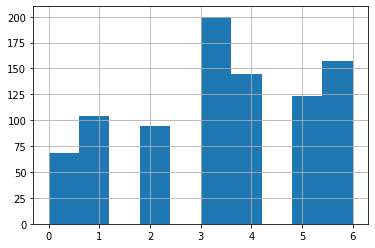

In [279]:
train_df['Age Group'].hist()

## Specify Prediction Target


In [247]:
#Survived is a prediction data
y = train_df['Survived']

In [248]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Relatives', 'Alone', 'Title',
       'Age Group'],
      dtype='object')

## Specify features

In [287]:
features = [ 'Pclass','Sex','Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Age Group', 'Cabin','Alone', 'Title','Relatives',]  

X = train_df[features]

## Split into validation and training data


In [288]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.15, random_state=1) #

## Specify and Fit Model

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

dtm = DecisionTreeClassifier(random_state = 1)
rtm = RandomForestClassifier(n_estimators = 100 ,random_state = 1, n_jobs = -1)

In [290]:
%time dtm.fit(train_X,train_y)
%time rtm.fit(train_X,train_y)

Wall time: 3.01 ms
Wall time: 129 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [291]:
%time dtm.score(val_X,val_y)

Wall time: 2.01 ms


0.7985074626865671

In [292]:
%time rtm.score(val_X,val_y)

Wall time: 103 ms


0.746268656716418

## Gridsearch - finding best params

In [293]:
# create param grid object 
from math import sqrt, log2

forrest_params = dict(     
    max_depth = [None],     
    min_samples_split = [2, 5, 10],
    min_samples_leaf = [1,3,5,10,25],     
    n_estimators = [100],
    max_features = ['auto', 'sqrt'],
    n_jobs = [-1]
)

In [294]:
# build and fit model 
forest_cv = GridSearchCV(estimator=rtm,     param_grid=forrest_params, cv=5) 
%time forest_cv.fit(train_X, train_y)

Wall time: 3min 28s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_de

In [295]:
print("Best score: {}".format(forest_cv.best_score_))
print("Optimal params: {}".format(forest_cv.best_estimator_))

Best score: 0.8269484808454426
Optimal params: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


## Predict on test data & save as .csv file

In [296]:
X_test = test_df[features]

In [297]:
forrest_predictions = forest_cv.predict(X_test)

In [298]:
# dataframe with predictions
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': forrest_predictions})

# save to csv
kaggle.to_csv('titanic_predictions2.csv', index=False)